In [ ]:
# prompt: connect to drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
cd resnet50


/content/drive/MyDrive/resnet50


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

training_set = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/dwdmlab/Training',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=True)

Found 2870 images belonging to 4 classes.


In [ ]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

testing_set = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/dwdmlab/Testing',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=True)

Found 394 images belonging to 4 classes.


In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
cnn = Sequential()
cnn.add(base_model)
cnn.add(GlobalAveragePooling2D())
cnn.add(Dense(units=256, activation='relu'))
cnn.add(Dense(units=4, activation='softmax'))

In [ ]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 256)               524544    
                                                                 
 dense_3 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 24113284 (91.98 MB)
Trainable params: 24060164 (91.78 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


In [ ]:
for layer in base_model.layers[:-8]:
    layer.trainable = True

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
cnn.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model
cnn.fit(x=training_set, batch_size=32, validation_data=testing_set, epochs=20)

Epoch 1/20
90/90 [==============================] - 101s 770ms/step - loss: 0.3827 - accuracy: 0.8551 - val_loss: 3.9594 - val_accuracy: 0.2665
Epoch 2/20
90/90 [==============================] - 68s 755ms/step - loss: 0.1464 - accuracy: 0.9474 - val_loss: 3.2609 - val_accuracy: 0.2665
Epoch 3/20
90/90 [==============================] - 68s 752ms/step - loss: 0.0988 - accuracy: 0.9662 - val_loss: 8.5323 - val_accuracy: 0.2665
Epoch 4/20
90/90 [==============================] - 68s 759ms/step - loss: 0.0715 - accuracy: 0.9767 - val_loss: 6.4400 - val_accuracy: 0.2665
Epoch 5/20
90/90 [==============================] - 69s 763ms/step - loss: 0.0576 - accuracy: 0.9784 - val_loss: 7.0842 - val_accuracy: 0.2665
Epoch 6/20
90/90 [==============================] - 69s 764ms/step - loss: 0.0263 - accuracy: 0.9906 - val_loss: 7.8692 - val_accuracy: 0.2690
Epoch 7/20
90/90 [==============================] - 67s 747ms/step - loss: 0.0463 - accuracy: 0.9861 - val_loss: 7.3057 - val_accuracy: 0.297

In [ ]:
accuracy = cnn.evaluate(testing_set)[1]
print("Test Accuracy:", accuracy)

13/13 [==============================] - 8s 578ms/step - loss: 1.3373 - accuracy: 0.7792
Test Accuracy: 0.779187798500061


13/13 [==============================] - 12s 805ms/step


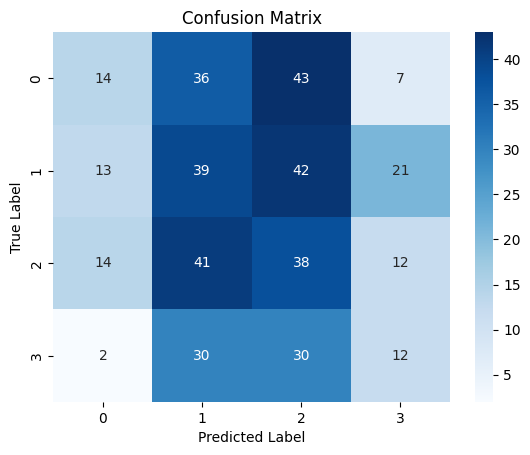

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = np.argmax(cnn.predict(testing_set), axis=1)

y_true = testing_set.classes

cm = confusion_matrix(y_true, y_pred)

sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


13/13 [==============================] - 7s 505ms/step


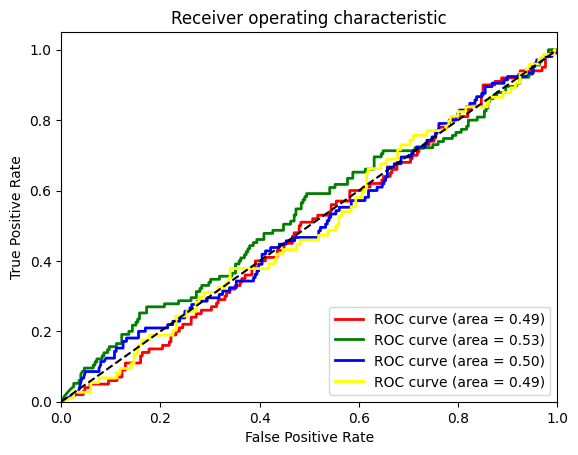

In [ ]:

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_prob = cnn.predict(testing_set)

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 4
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(testing_set.classes == i, y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = ['red', 'green', 'blue', 'yellow']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = %0.2f)' % roc_auc[i])

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
